# **Un proceso completo de análisis....** Vamos a repasar y fijar tantas cosas que hemos visto hasta ahora.

Este es un conjunto de datos y especial para mi puesto que con este conjunto de datos y alguna metodología realicé una presentación con la que gané concurso acá en la UTB. Así que voy a mostrarles algunas cosas bonitas, repasaremos todo los visto y además cerraremos con broche de oro lo que hemos visto.
Hoy trabajaremos con un sólo conjunto de datos. Pero quiero que hagamos un análisis completo... De principio a fin... Siempre quedan mucha más cosas por hacer, pero hoy trateremos de cubrir todo..

## Data source:
- Data comes from an original (non-machine-learning) study: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)

## Original Owners of Database:
- Marine Resources Division. Marine Research Laboratories - Taroona. Department of Primary Industry and Fisheries, Tasmania. GPO Box 619F, Hobart, Tasmania 7001, Australia (contact: Warwick Nash +61 02 277277, wnash '@' dpi.tas.gov.au)

## Donor of Database:
- Sam Waugh (Sam.Waugh '@' cs.utas.edu.au) Department of Computer Science, University of Tasmania GPO Box 252C, Hobart, Tasmania 7001, Australia

## Data Set Information:
- Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.
- From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

<p float="left">
  <img src="https://images.thefishsite.com/fish/articles/Australasia/green-abalone.jpg?profile=article-inline@maximum" width="640" />
  <img src="https://www.researchgate.net/profile/Paul-Lee-15/publication/26254910/figure/fig3/AS:310073449566213@1450938679680/The-cross-section-of-the-abalone-shell-showing-a-layered-microstructure-composed-of.png" width="424" /> 
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Loading data:
data=pd.read_csv("../Datas/abalone.data",names=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"])
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# Outlier detection 
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

Dado que los valores atípicos pueden tener un efecto dramático en la predicción (especialmente para problemas de regresión), elegí administrarlos.

Utilicé el método de Tukey (Tukey JW., 1977) para detectar los valores atípicos que definen un rango intercuartílico comprendido entre el 1er y el 3er cuartil de los valores de distribución (RIC). Un valor atípico es una fila que tiene un valor de característica fuera del (IQR +- un paso de valor atípico).

Decidí detectar valores atípicos de las funciones de valores numéricos. Luego, consideré los valores atípicos como filas que tienen al menos dos valores numéricos atípicos.

In [5]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [6]:
data.loc[Outliers_to_drop] # Show the outliers rows

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,I,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
306,I,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
718,I,0.180,0.125,0.035,0.0265,0.0095,0.0055,0.0085,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
720,I,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3


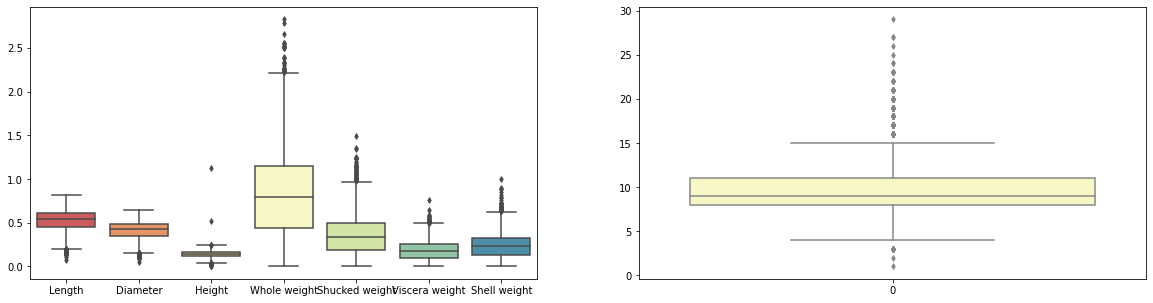

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["Rings"],fliersize=4,palette="Spectral")

plt.show()

In [8]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4134,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4135,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4136,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4137,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [9]:
# Fill empty and NaNs values with NaN
data=data.fillna(np.nan)
# Check for Null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
# Summarie and statistics (again)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000
mean,0.524789,0.408485,0.139752,0.825602,0.357644,0.179972,0.238259,9.954337
std,0.116891,0.096688,0.041005,0.477437,0.215282,0.107002,0.136333,3.203519
min,0.135000,0.105000,0.000000,0.015500,0.005000,0.000500,0.005000,3.000000
25%,0.450000,0.350000,0.115000,0.444750,0.187750,0.094250,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.500500,0.252000,0.325750,11.000000
max,0.800000,0.630000,1.130000,2.555000,1.351000,0.590000,1.005000,29.000000


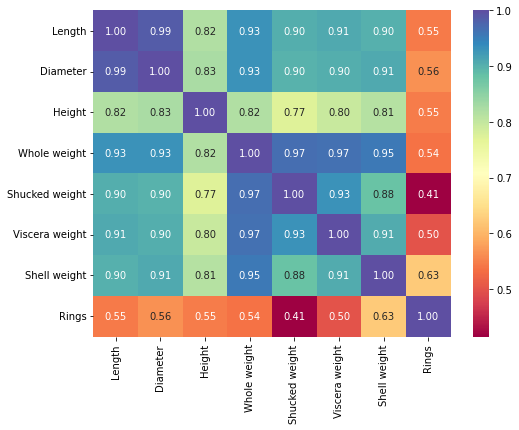

In [11]:
# Correlation matrix between numerical values
plt.figure(figsize=(8,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

- Parece que solo "Shell weight" tiene una correlación significativa con la cantidad de anillos. 
- No significa que las otras características no sean útiles. Las otras se pueden correlacionar entre si y también con la cantidad de anillos. Para determinar esto, necesitamos explorar en detalle estas características.

<Figure size 360x216 with 0 Axes>

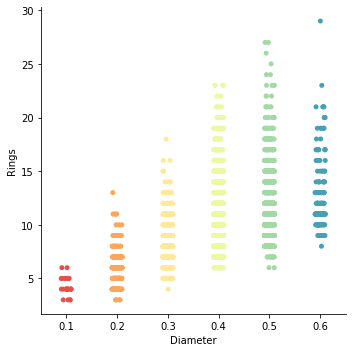

In [12]:
plt.figure(figsize=(5,3))
g = sb.catplot(x="Diameter",y="Rings",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

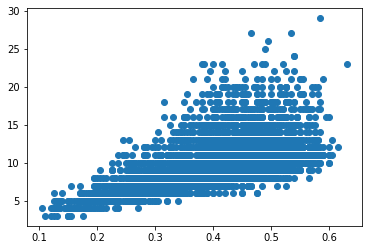

In [13]:
plt.scatter(data["Diameter"],data["Rings"])
plt.show()

Por otro lado con las variables que son categóricas....

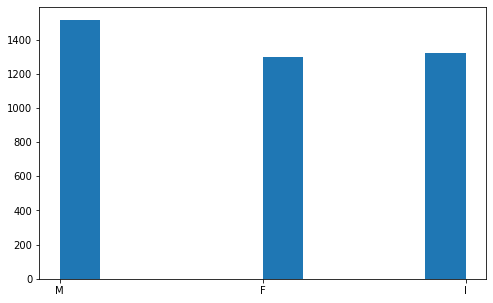

In [14]:
plt.figure(figsize=(8,5))
plt.hist(data["Sex"])
plt.show()

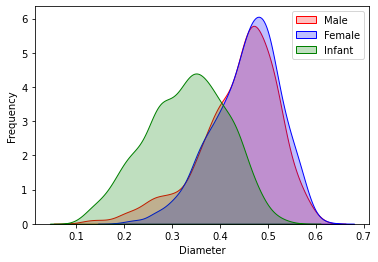

In [15]:
# Explore Age distibution 
g=sb.kdeplot(data["Diameter"][(data["Sex"]=="M")],color="Red",shade=True)
g=sb.kdeplot(data["Diameter"][(data["Sex"]=="F")],color="Blue",shade=True)
g=sb.kdeplot(data["Diameter"][(data["Sex"]=="I")],color="Green",shade=True)
g.set_xlabel("Diameter")
g.set_ylabel("Frequency")
g=g.legend(["Male","Female","Infant"])

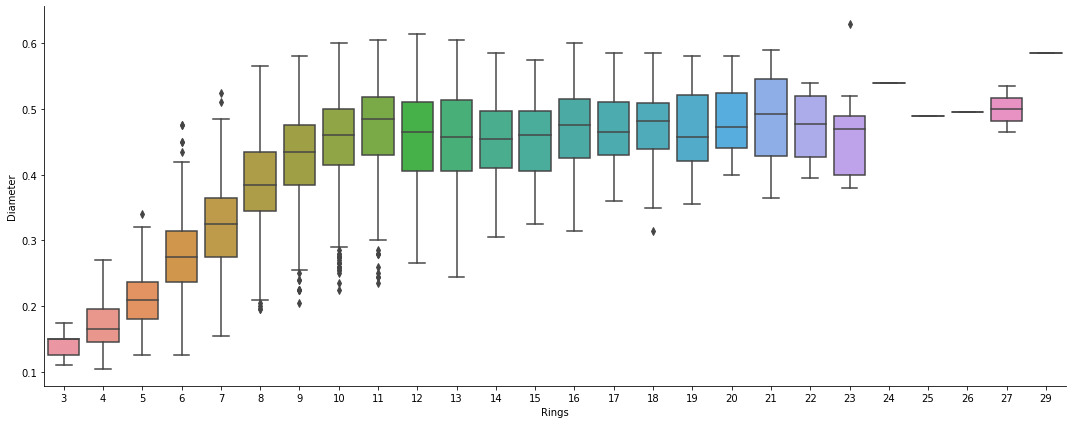

In [16]:
g=sb.catplot(x="Rings",y="Diameter",data=data,kind="box",height=6,aspect=2.5)

In [17]:
# convert to indicator values Title and Embarked 
data0=pd.get_dummies(data,columns=["Sex"])
data1=data.drop(columns="Sex")

In [18]:
data1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4134,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4135,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4136,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4137,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Ahora si vamos a modelar....


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=data1.drop(columns="Rings")
y=data1["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

## **Modelización simple**
### Validación cruzada de modelos

Vamos a comparar varios clasificadores populares y evaluar la precisión media de cada uno de ellos mediante un procedimiento de validación cruzada estratificada de kfold.
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Linear Regression

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [22]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

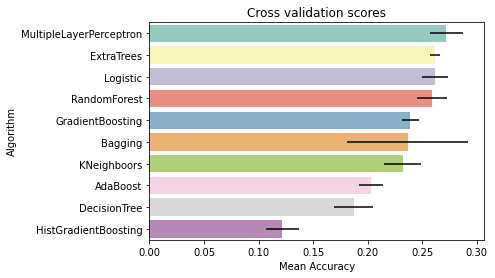

In [23]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [24]:
cv_res

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
9,0.271910,0.015095,0.276720,MultipleLayerPerceptron
3,0.261810,0.013355,0.224744,ExtraTrees
6,0.261806,0.016587,0.248170,Logistic
0,0.258927,0.015260,0.246706,RandomForest
2,0.239095,0.011723,0.252562,GradientBoosting
4,0.236569,0.007506,0.224012,Bagging
7,0.231881,0.010784,0.231332,KNeighboors
1,0.203027,0.004416,0.201318,AdaBoost
8,0.187173,0.018024,0.197657,DecisionTree
5,0.121492,0.055586,0.098829,HistGradientBoosting


En vista de lo anterior, podemos decidir elegir los clasificadores RandomForest, Logistic y MultipleLayerPercepton y quizás Extratrees para el modelado de conjunto.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

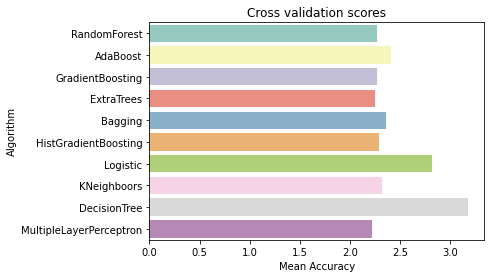

In [25]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X_train,y_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Combinando Modelos....

### **Si es como un problema de clasificación....**

In [26]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

Log = LogisticRegression()
Log.fit(X_train,y_train)

EXTC = ExtraTreesClassifier()
EXTC.fit(X_train,y_train)

MLPC = MLPClassifier()
MLPC.fit(X_train,y_train)

pred_RFC=RFC.predict(X_test)
pred_Log=Log.predict(X_test)
pred_EXTC=EXTC.predict(X_test)
pred_MLPC=MLPC.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
for i,j in zip([pred_RFC,pred_EXTC,pred_Log,pred_MLPC],["RFC","EXTC","Log","MLPC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  2.623522382700964
RMSE for  EXTC is  2.676698431814004
RMSE for  Log is  2.816236130789303
RMSE for  MLPC is  2.53453453323217


**Ahora hagamos el ensamble por Voto (Voting)...**

In [28]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('rfc', RFC),('extc', EXTC),('MLPC',MLPC),('LOG',Log)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting = votingC.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting,y_test)))

RMSE for Voting is  2.5905278522804385


**Ahora hagamos el ensamble por Apilamiento (Stacking)...**

In [30]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('rfc', RFC),('extc', EXTC),('MLPC',MLPC),('LOG',Log)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Rings_predicted_All_Stacking = stackingC.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_spli

In [31]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Rings_predicted_All_Stacking,y_test)))

RMSE for Stacking is  2.439307200687626


In [32]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","EXTC","MLPC","Log","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_EXTC),rmse(pred_MLPC),rmse(pred_Log),rmse(Rings_predicted_All_Voting),rmse(Rings_predicted_All_Stacking)]

In [33]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,EXTC,MLPC,Log,Voting,Stacking
RMSE,2.623522,2.676698,2.534535,2.816236,2.590528,2.439307


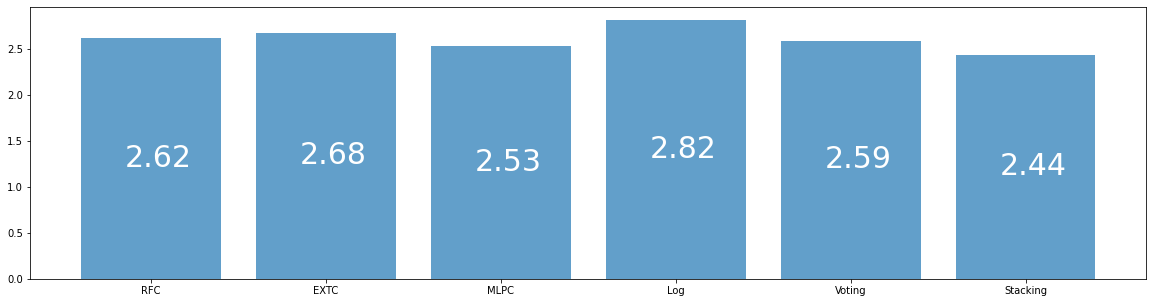

In [34]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

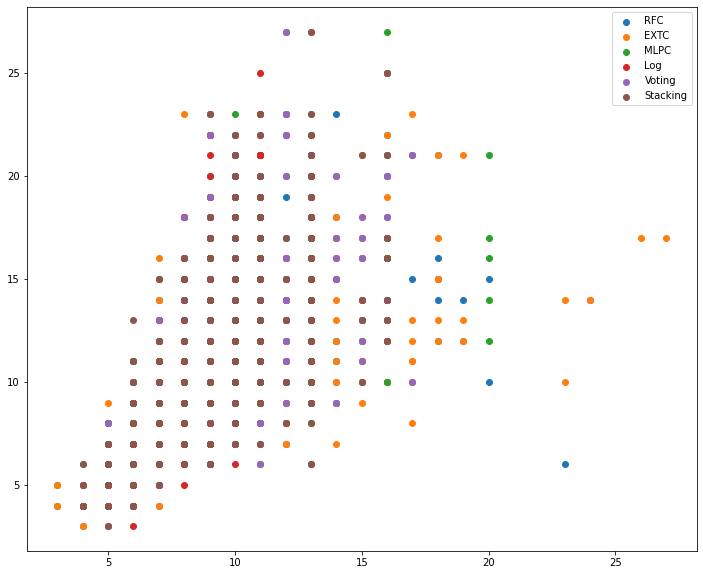

In [35]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_EXTC,pred_MLPC,pred_Log,Rings_predicted_All_Voting,Rings_predicted_All_Stacking],["RFC","EXTC","MLPC","Log","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()

### **Si es como un problema de regresión....**

In [36]:
RFC = RandomForestRegressor()
RFC.fit(X_train,y_train)

Bag = BaggingRegressor()
Bag.fit(X,y)

EXTC = ExtraTreesRegressor()
EXTC.fit(X_train,y_train)

AdaC = AdaBoostRegressor()
AdaC.fit(X_train,y_train)

pred_RFC=RFC.predict(X_test)
pred_Bag=Log.predict(X_test)
pred_EXTC=EXTC.predict(X_test)
pred_Ada=MLPC.predict(X_test)

In [37]:
for i,j in zip([pred_RFC,pred_EXTC,pred_Log,pred_MLPC],["RFC","EXTC","Log","MLPC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  2.2632053837594146
RMSE for  EXTC is  2.2487017728570335
RMSE for  Log is  2.816236130789303
RMSE for  MLPC is  2.53453453323217


**Ahora hagamos el ensamble por Voto (Voting)...**

In [38]:
#voting : {'hard', 'soft'}
votingC = VotingRegressor(estimators=[('rfc', RFC),('bag', Bag),('AdaC',AdaC),('EXTC',EXTC)], n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Rings_predicted_All_Voting = votingC.predict(X_test)

In [39]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Rings_predicted_All_Voting,y_test)))

RMSE for Voting is  2.2794633594675866


**Ahora hagamos el ensamble por Apilamiento (Stacking)...**

In [40]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingRegressor(estimators=[('rfc', RFC),('bag', Bag),('AdaC',AdaC),('EXTC',EXTC)], n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Rings_predicted_All_Stacking = stackingC.predict(X_test)

In [41]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Rings_predicted_All_Stacking,y_test)))

RMSE for Stacking is  2.228319545810789


In [42]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","EXTC","Bag","Ada","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_EXTC),rmse(pred_Bag),rmse(pred_Ada),rmse(Rings_predicted_All_Voting),rmse(Rings_predicted_All_Stacking)]

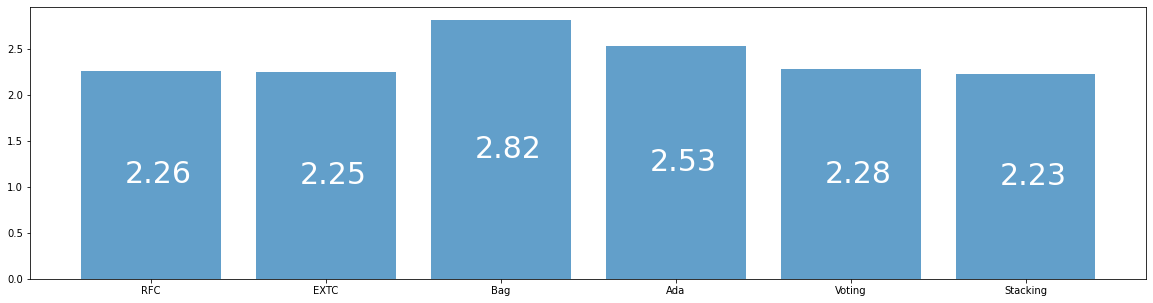

In [43]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

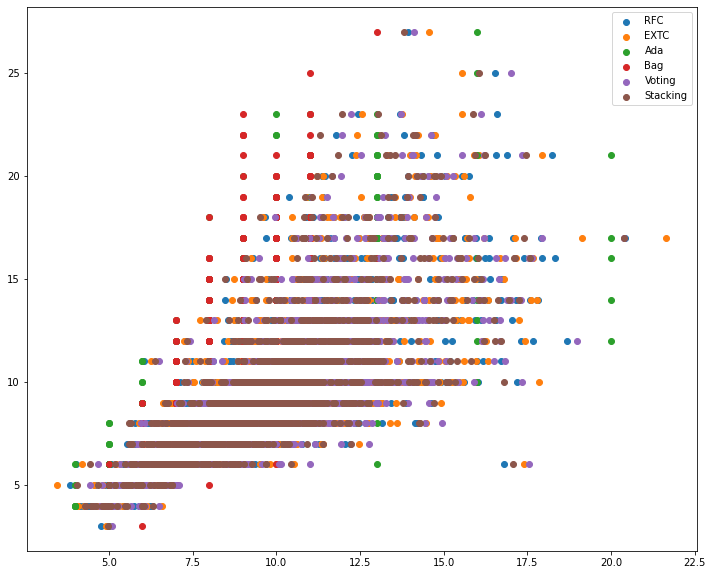

In [44]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_EXTC,pred_Ada,pred_Bag,Rings_predicted_All_Voting,Rings_predicted_All_Stacking],["RFC","EXTC","Ada","Bag","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()